In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
sns.set(rc={'figure.figsize':(13, 7.5)})

In [2]:
# Load data
data = pd.read_csv("Diet_R.csv")
data

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [3]:
# Vì Person 25, 26 thiếu dữ liệu ở Gender -> loại bỏ 
df = data.drop([0, 1])
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [4]:
# Sắp xếp index 

df = df.set_index('Person')
df = df.sort_index()
df

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
...,...,...,...,...,...,...
74,1,35,183,83,3,80.2
75,1,49,177,84,3,79.9
76,1,28,164,85,3,79.7


In [5]:
df.isna().any()

gender          False
Age             False
Height          False
pre.weight      False
Diet            False
weight6weeks    False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 78
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        76 non-null     object 
 1   Age           76 non-null     int64  
 2   Height        76 non-null     int64  
 3   pre.weight    76 non-null     int64  
 4   Diet          76 non-null     int64  
 5   weight6weeks  76 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.2+ KB


**Rút ra nhận xét:**
- Kích thước dữ liệu: 76 Hàng, 5 Cột
- Không có giá trị trống (null/NA)
- Loại dữ liệu gồm object (cột gender); float64(weight6weeks) và int64 (các cột còn lại)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,76.0,39.223684,9.908379,16.0,32.50,39.00,47.250,60.0
Height,76.0,170.776316,11.419981,141.0,163.75,169.00,175.250,201.0
pre.weight,76.0,72.289474,7.974653,58.0,66.00,72.00,78.000,88.0
Diet,76.0,2.039474,0.823663,1.0,1.00,2.00,3.000,3.0
weight6weeks,76.0,68.343421,8.058938,53.0,61.95,68.95,73.675,84.5


# Task 1: Paired t-test
## Ignore diet and test to see if weight has been lost
"Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa"

### Phát biểu giả thiết:

$H_0: \mu_0 = \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân là như nhau 

$H_1: \mu_0 \neq \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân khác nhau


In [8]:
pre = df['pre.weight']
aft = df['weight6weeks']    

In [9]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [10]:
from scipy import stats as st
p = {}
p['mean1'] = np.mean(pre)
p['mean2'] = np.mean(aft)
p['score'], p['p_value'] = st.ttest_ind(pre, aft)
print('Kiểm định t test 2 sample')
results(p)

Kiểm định t test 2 sample


,mean1,mean2,score,p_value,KetLuan
,72.289474,68.343421,3.034226,0.002843,Chấp nhận H1 với mức ý nghĩa 0.05


In [11]:
from scipy import stats as st
std1, p1 = st.ttest_ind(pre, aft)
print('stat:',std1,'pvalue:', p1)
print("-"*50)
alpha = 0.05
if p1 < alpha:
    print('Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.')
else:
    print('Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân không có sự khác biệt')

stat: 3.0342255247628476 pvalue: 0.0028431949414180584
--------------------------------------------------
Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.


Text(0.5, 1.0, 'Weight before and after diet')

<Figure size 432x576 with 0 Axes>

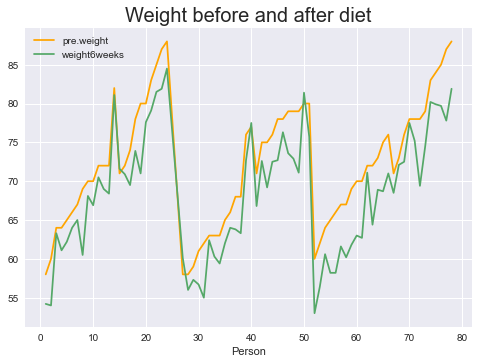

In [12]:
# Biểu đồ cân nặng trước và sau 6 tuần
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8))
plt.style.use('seaborn')
df[['pre.weight', 'weight6weeks']].plot(color= ['orange', 'g'])
plt.title('Weight before and after diet', fontsize=20)

# Task 2: Compute variable
## Remove weight lost and get students to calculate it using before/after weights

In [13]:
df['weightlost'] = df['pre.weight'] - df['weight6weeks']
df

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,83,3,80.2,2.8
75,1,49,177,84,3,79.9,4.1
76,1,28,164,85,3,79.7,5.3


In [14]:
df['weightlost'].describe()

count    76.000000
mean      3.946053
std       2.505803
min      -2.100000
25%       2.300000
50%       3.700000
75%       5.650000
max       9.200000
Name: weightlost, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight lost')

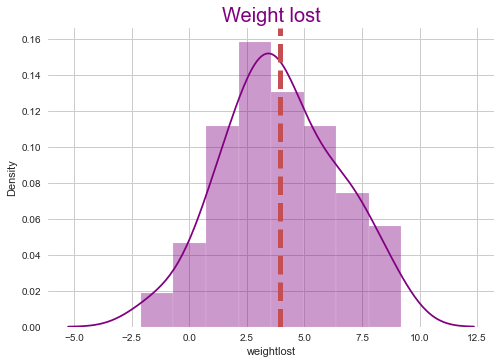

In [15]:
sns.set_style("whitegrid")
sns.distplot(df['weightlost'], color='purple')
plt.axvline(df['weightlost'].mean(), color="r", linestyle="dashed", linewidth=5)
plt.title('Weight lost', size=20, color='purple')

# Task 3: Summary statistics
## Summary statistics by diet

In [16]:
data3 = df[['Diet', 'weightlost']]
data3

,Diet,weightlost
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [17]:
# Bảng tần số
diet = df.groupby('Diet')['Diet'].count()
diet = pd.DataFrame(diet)
diet.columns = ['Frequency']
diet['Percent'] = diet/sum(diet['Frequency'])*100
diet

,Frequency,Percent
Diet,,
1,24,31.578947
2,25,32.894737
3,27,35.526316


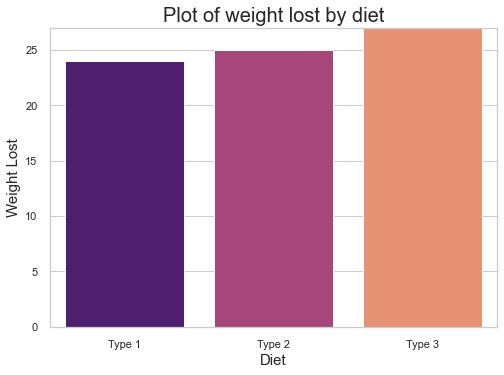

In [18]:
diet.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
g=sns.barplot(x='Diet',y='Frequency',data = diet, palette='magma')
g.set_xticklabels(["Type 1", "Type 2", "Type 3"])
g.set(ylim=(0, 27))
plt.ylabel('Weight Lost',size=15)
plt.xlabel('Diet', size=15)
plt.title('Plot of weight lost by diet', size=20)
plt.show()

### Thông kê đơn giản với 3 phương pháp ăn kiêng bằng hàm describle

In [19]:
diet = data3.groupby('Diet').groups
# Lấy giá trị tương ứng ở cột des_weight 
type_1 = data3['weightlost'][diet[1]]
type_1.name = 'Diet Type 1'
type_2 = data3['weightlost'][diet[2]]
type_2.name = 'Diet Type 2'
type_3 = data3['weightlost'][diet[3]]
type_3.name = 'Diet Type 3'

In [20]:
diet

{1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 2: [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], 3: [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]}

In [21]:
type_1.describe()

count    24.000000
mean      3.300000
std       2.240148
min      -0.600000
25%       1.975000
50%       3.050000
75%       3.950000
max       9.000000
Name: Diet Type 1, dtype: float64

In [22]:
type_2.describe()

count    25.000000
mean      3.268000
std       2.464535
min      -2.100000
25%       2.000000
50%       3.500000
75%       4.700000
max       7.900000
Name: Diet Type 2, dtype: float64

In [23]:
type_3.describe()

count    27.000000
mean      5.148148
std       2.395568
min       0.500000
25%       3.450000
50%       5.400000
75%       7.000000
max       9.200000
Name: Diet Type 3, dtype: float64

# Task 4: One way ANOVA

## 4.1: Which diet was best for losing weight?

Xây dựng giả thiết:

- $H_0: \mu_1 = \mu_2 = \mu_3$

- $H_1: \mu_i \neq \mu_j$ (i $\neq$ j ,  i, j $\in \overline{1,3}$)

### Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

#### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

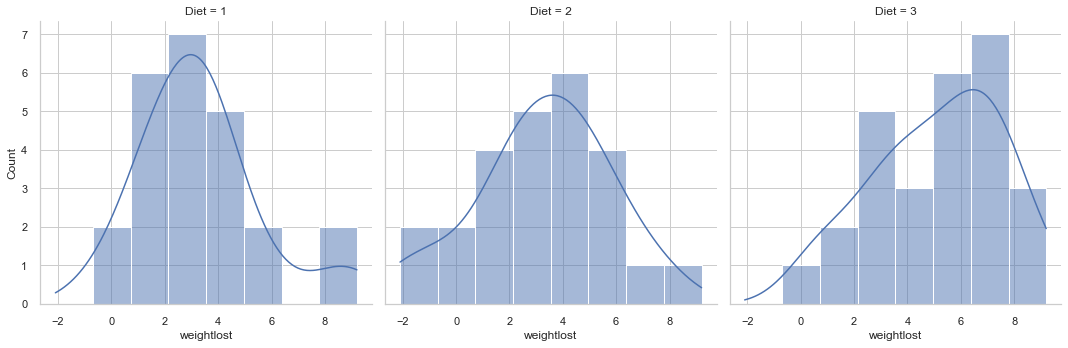

In [24]:
g=sns.displot(data=data3,x='weightlost',col='Diet',kde=True)

In [25]:
# Lấy sample(20)
type_1=type_1.sample(20)
type_2=type_2.sample(20)
type_3=type_3.sample(20)

In [26]:
# Hàm kiểm định Shapiro và đồ thị phân phối
from scipy.stats import shapiro
def shapiro_test(data):
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
    sns.distplot(data, ax=axes[0], color='green')
    plt.tight_layout()

    data = (data - data.mean()) / data.std()
    sm.qqplot(data,ax=axes[1], line='45')
    plt.tight_layout()
    fig.suptitle(data.name, size=18)

    stat, p = shapiro(data)
    print('Kiểm định Shapiro cho',data.name)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        print('Đủ điều kiện để phân tích tiếp')
    else:
        print('Dữ liệu không tuân theo luật phân phối chuẩn')
    print('-'*50)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kiểm định Shapiro cho Diet Type 1
stat=0.902, p=0.046
Dữ liệu không tuân theo luật phân phối chuẩn
--------------------------------------------------


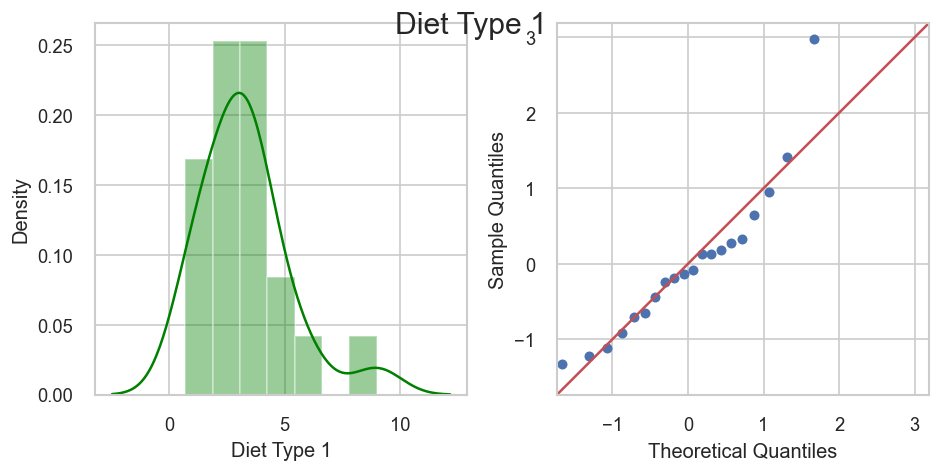

In [27]:
shapiro_test(type_1)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kiểm định Shapiro cho Diet Type 2
stat=0.981, p=0.943
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


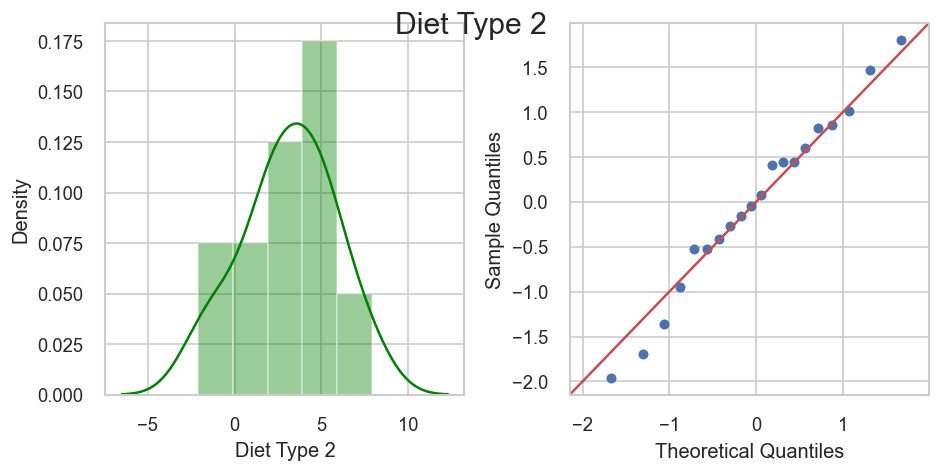

In [28]:
shapiro_test(type_2)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kiểm định Shapiro cho Diet Type 3
stat=0.948, p=0.343
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp
--------------------------------------------------


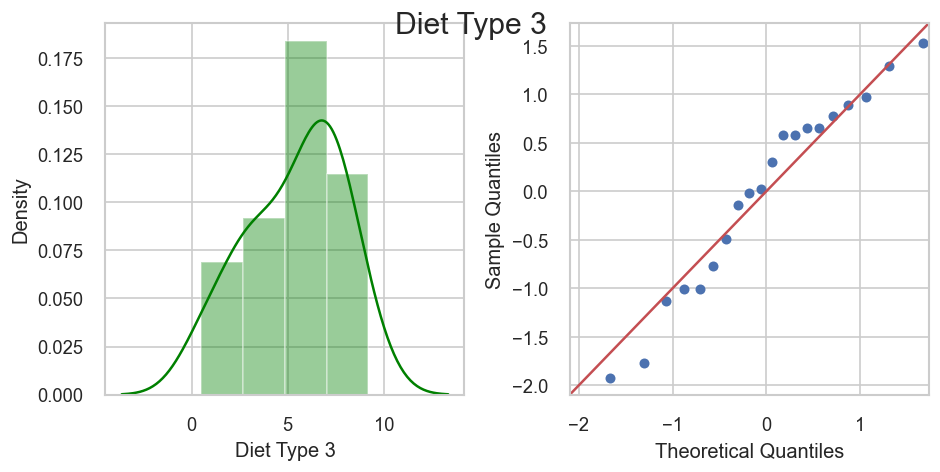

In [29]:
shapiro_test(type_3)

### Kiểm định tính thuần nhất phương sai (homogeneity of variance)

#### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [30]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [31]:
p={}
from scipy.stats import bartlett
p['score'], p['p_value'] = bartlett(type_1, type_2, type_3)
if p['p_value'] > 0.05:
    print('Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các feature không đồng nhất về phương sai')
results(p)

Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


,score,p_value,KetLuan
,2.043685,0.359931,Chấp nhận H0 với mức ý nghĩa 0.05


### Phân tích ANOVA

In [32]:
# Tiến hành phân tích ANOVA 1 chiều
p={}
from scipy.stats import f_oneway
p['score'], p['p_value'] = f_oneway(type_1, type_2, type_3)
alpha = 0.05
if (p['p_value'] < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt.')
results(p)

Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt


,score,p_value,KetLuan
,5.446517,0.006846,Chấp nhận H1 với mức ý nghĩa 0.05


In [33]:
# ANOVA table

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weightlost ~ C(Diet)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN


### Hậu kiểm ANOVA

In [34]:
# Hậu kiểm ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['weightlost'],
                          groups=df['Diet'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.032,0.9,-1.6531,1.5891,False
1,3,1.8481,0.0188,0.2567,3.4396,True
2,3,1.8801,0.0152,0.3057,3.4546,True


**Từ bảng tukey ta thấy:**
- Chỉ số p-adj giữa 1 và 2 rất cao cho thấy hầu như không có sự khác biệt giữa chế độ ăn 1 và 2.Nhưng lại có sự khác biệt lớn giữa chế độ 3 - 1(p-adj = 0.0188 < 0.05) và 3 – 2(p-adj = 0.0152)
**Từ đó thấy có sự khác biệt giữa chế độ 3 so với 1 và 2**
- Từ chỉ số meandiff cho thấy giữa 3-2 và 3-1 là lớn nhất  **chế độ 3 là phương pháp hiệu quả nhất.**

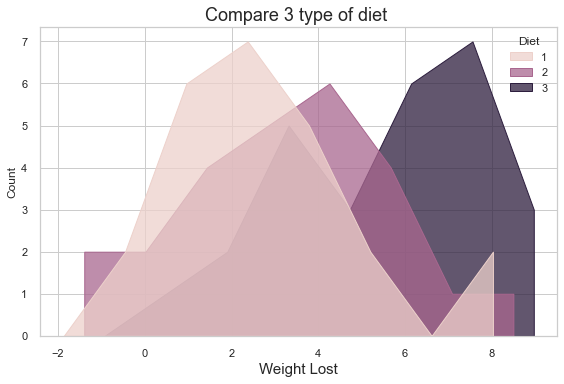

In [35]:
sns.set_style("whitegrid")
sns.histplot(df, x='weightlost', hue="Diet", element="poly",multiple='dodge')
plt.xlabel('Weight Lost',size=15)
plt.title('Compare 3 type of diet ', size=18)
plt.tight_layout()


Nhận xét:
 - Có sự khác biệt giữa Diet1 và 3 lẫn Diet2 và 3
 - Giữa Diet1 và Diet2 không có sự khác biệt

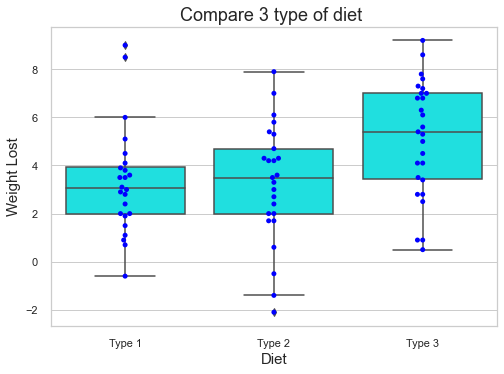

In [36]:
g=sns.boxplot(x='Diet', y='weightlost', data=df, color='cyan')
sns.swarmplot(x="Diet", y="weightlost", data=df, color='blue')
plt.title('Compare 3 type of diet ', size=18)
g.set_xticklabels(["Type 1", "Type 2", "Type 3"])
plt.ylabel('Weight Lost',size=15)
plt.xlabel('Diet', size=15)
plt.show()

## 4.2: Are there gender differences for weight lost?

- Xây dựng giả thuyết 

$H_0:$ Khả năng giảm cân phụ thuộc vào giới tính

$H_0:$ Khả năng giảm cân không phụ thuộc vào giới tính

In [37]:
data42 = df[['gender', 'weightlost']]
data42

,gender,weightlost
Person,,
1,0,3.8
2,0,6.0
3,0,0.7
4,0,2.9
5,0,2.8
...,...,...
74,1,2.8
75,1,4.1
76,1,5.3


In [38]:
# Bảng tần số (0:Female; 1:Male)
gender = df.groupby('gender')['gender'].count()
gender = pd.DataFrame(gender)
gender.columns = ['Frequency']
gender['Percent'] = gender/sum(gender['Frequency'])*100
gender

,Frequency,Percent
gender,,
0,43,56.578947
1,33,43.421053


In [39]:
# import numpy as np
# import seaborn as sns
# sns.set_theme(style="whitegrid")


# # Plot the residuals after fitting a linear model
# sns.residplot(data=gender, x='Frequency', lowess=True, color="g")

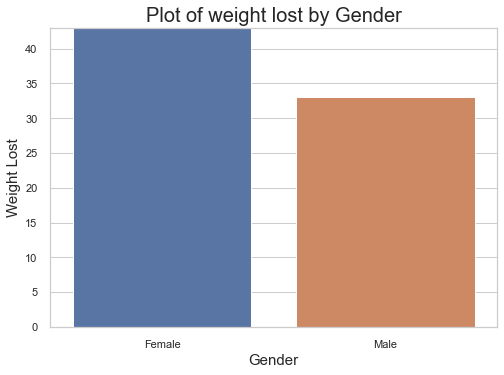

In [40]:
gender.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
g=sns.barplot(x='gender',y='Frequency',data = gender)
g.set_xticklabels(["Female", "Male"])
g.set(ylim=(0, 43))
plt.ylabel('Weight Lost',size=15)
plt.xlabel('Gender', size=15)
plt.title('Plot of weight lost by Gender', size=20)
plt.show()

In [41]:
# Nhóm các mẫu
gr42 = data42.groupby('gender').groups
female = data42['weightlost'][gr42['0']]
female.name = 'Female'
male = data42['weightlost'][gr42['1']]
male.name = 'Male'

### Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

#### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

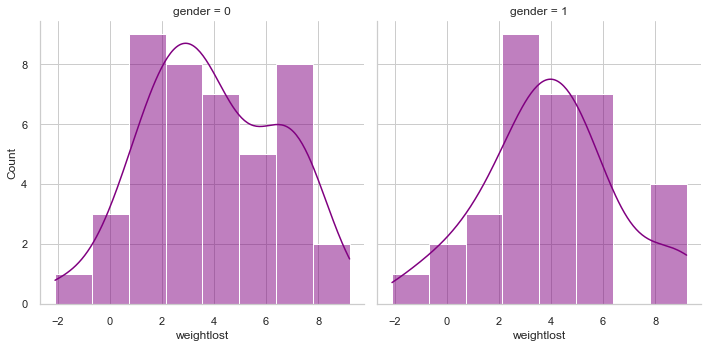

In [42]:
g=sns.displot(data=data42,x='weightlost',col='gender',kde=True, color='purple')

In [43]:
# Lấy mẫu ngẫu nhiên: sample(30)
male=male.sample(30)
female=female.sample(30)

Kiểm định Shapiro cho Male
stat=0.978, p=0.779
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn
Đủ điều kiện để phân tích tiếp


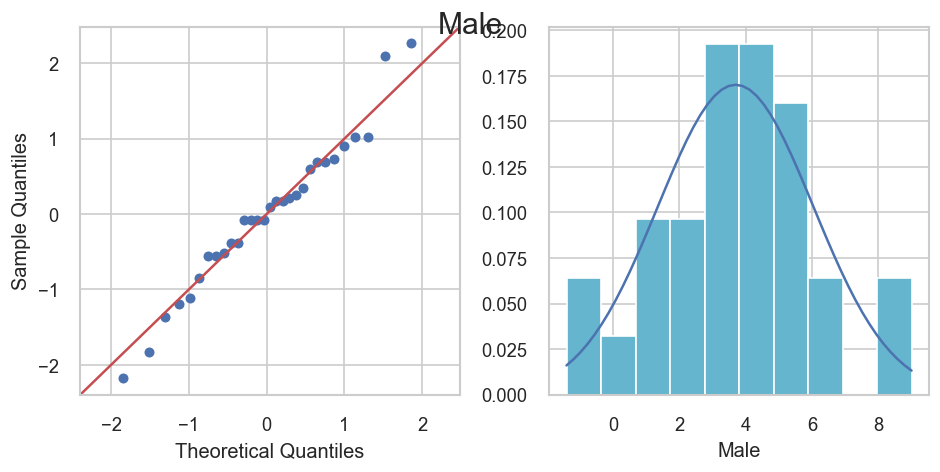

In [44]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
#sns.distplot(male, ax=axes[0], color='blue')
mean = np.mean(male)
# ddof=1 :: hiệu chỉnh
std = np.std(male, ddof=1)
domain = np.linspace(np.min(male), np.max(male))
plt.plot(domain, st.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(male, color='c', edgecolor='white', density=True)
plt.xlabel('Male')
plt.tight_layout()
plt.tight_layout()

qqm = (male - male.mean()) / male.std()
sm.qqplot(qqm,ax=axes[0], line='45')
plt.tight_layout()
fig.suptitle(male.name, size=18)

stat, p = shapiro(male)
print('Kiểm định Shapiro cho', male.name)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    print('-'*50)

Kiểm định Shapiro cho Female
stat=0.922, p=0.030
Dữ liệu không tuân theo luật phân phối chuẩn
--------------------------------------------------


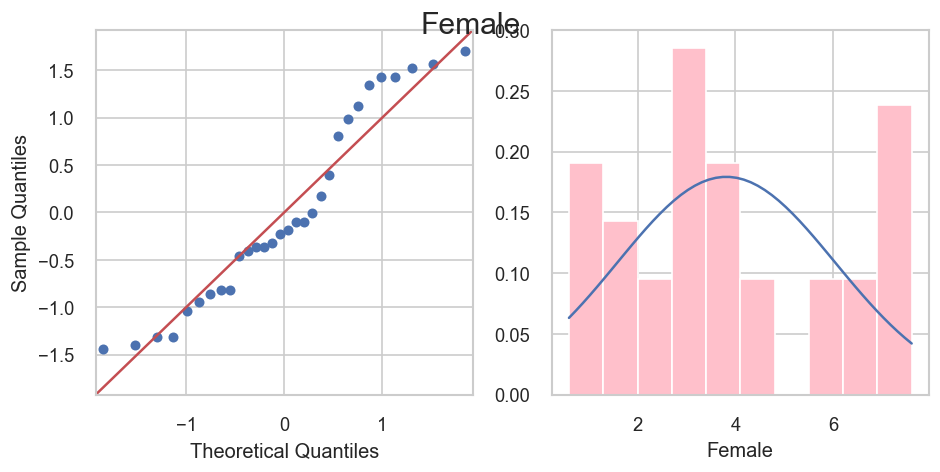

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

mean = np.mean(female)
# ddof=1 :: hiệu chỉnh
std = np.std(female, ddof=1)
domain = np.linspace(np.min(female), np.max(female))
plt.plot(domain, st.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(female, color='pink', edgecolor='white', density=True)
plt.xlabel('Female')
plt.tight_layout()
qqf = (female - female.mean()) / female.std()
sm.qqplot(qqf,ax=axes[0], line='45')
plt.tight_layout()
fig.suptitle(female.name, size=18)

stat, p = shapiro(female)
print('Kiểm định Shapiro cho', female.name)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')
    print('-'*50)

## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [46]:
from scipy.stats import bartlett
stat_bartlett, p_bartlett = bartlett(female,male)
print(stat_bartlett, p_bartlett)
if p_bartlett > 0.05:
    print('Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các feature không đồng nhất về phương sai')

0.07949935018768499 0.7779770255533673
Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


### Phân tích ANOVA

In [47]:
from scipy.stats import f_oneway
std3 , p3 = f_oneway(female, male)
print('P_value = ',p3)
alpha = 0.05
if (p3 < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có ảnh hưởng bởi giới tính')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.')

P_value =  0.8440051940272029
Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không ảnh hưởng bởi giới tính.


In [48]:
# ANOVA Table

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weightlost ~ C(gender)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


### Hậu kiểm ANOVA

In [49]:
# Hậu kiểm ANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['weightlost'],
                          groups=df['gender'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.1221,0.8397,-1.0408,1.2851,False


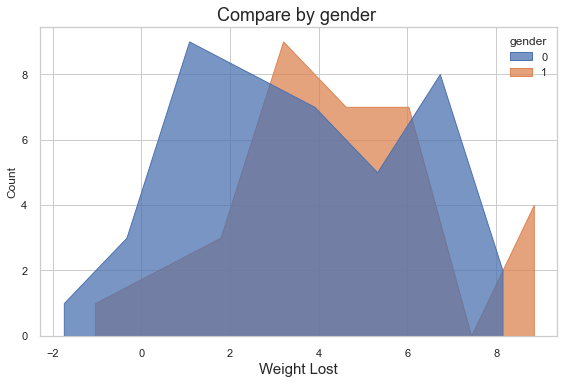

In [50]:
sns.set_style("whitegrid")
sns.histplot(data42, x='weightlost', hue="gender", element="poly",multiple='dodge')
plt.xlabel('Weight Lost',size=15)
plt.title('Compare by gender ', size=18)
plt.tight_layout()

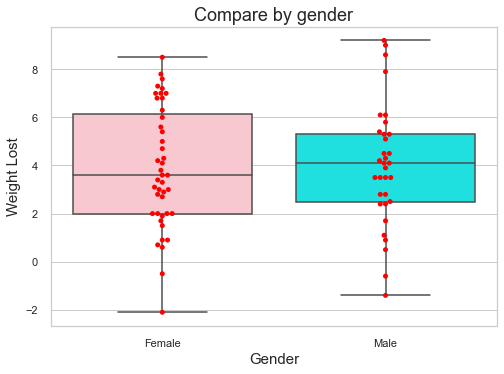

In [51]:
g=sns.boxplot(x='gender', y='weightlost', data=data42, palette=['pink','cyan'])
sns.swarmplot(x="gender", y="weightlost", data=data42, color='red')
plt.title('Compare by gender', size=18)
g.set_xticklabels(["Female", "Male"])
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Weight Lost',fontsize=15)
plt.show()

# Task5: Two-way ANOVA
### Effect of diet and gender on weight lost

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('weightlost ~ C(Diet) + C(gender) + C(Diet):C(gender)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Diet),60.417220,2.0,5.619026,0.005456
C(gender),0.168696,1.0,0.031379,0.859910
C(Diet):C(gender),33.904068,2.0,3.153204,0.048842
Residual,376.329043,70.0,NaN,NaN


# Task6: Interactions
### Means plot of weight lost by diet and gender

In [53]:
task6 = df[['gender','Diet','weightlost']]
task6['gender'] = task6['gender'].replace(to_replace =['0' ,'1'], 
                            value =['Female','Male'])
task6.sample(5)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,gender,Diet,weightlost
Person,,,
72,Male,3,8.6
51,Male,2,4.3
67,Male,3,2.5
15,Male,1,-0.6
35,Female,2,3.0


In [57]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
Reg6 = ols(formula = "weightlost ~ gender + Diet", data = task6)
Fit6 = Reg6.fit()

Text(0.5, 1.0, 'Plot of weight lost by diet and gender')

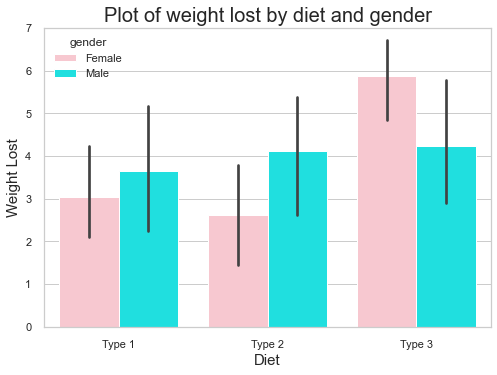

In [58]:
sns.set_theme(style="whitegrid")
g=sns.barplot(x="Diet", y="weightlost", hue="gender", data=task6, palette=['pink','cyan'])
g.set_xticklabels(["Type 1", "Type 2", "Type 3"])
g.set(ylim=(0, 7))
plt.ylabel('Weight Lost',size=15)
plt.xlabel('Diet', size=15)
plt.title('Plot of weight lost by diet and gender', size=20)

# Task7: ANCOVA
### Add height to either ANOVA

https://www.statisticshowto.com/ancova/

In [59]:
data7 = df[['Height', 'gender', 'Diet', 'weightlost']]
data7

,Height,gender,Diet,weightlost
Person,,,,
1,159,0,1,3.8
2,192,0,1,6.0
3,170,0,1,0.7
4,171,0,1,2.9
5,170,0,1,2.8
...,...,...,...,...
74,183,1,3,2.8
75,177,1,3,4.1
76,164,1,3,5.3


In [60]:
from pingouin import ancova
ancova(data=data7, dv='weightlost', covar='Height', between='Diet')

,Source,SS,DF,F,p-unc,np2
0,Diet,54.939344,2,4.824629,0.010807,0.118179
1,Height,0.460119,1,0.080813,0.777015,0.001121
2,Residual,409.941688,72,NaN,NaN,NaN


In [61]:
ancova(data=data7, dv='weightlost', covar='Height', between='gender')

,Source,SS,DF,F,p-unc,np2
0,gender,2.148484,1,0.338942,0.562235,0.004622
1,Height,7.917783,1,1.249098,0.267390,0.016823
2,Residual,462.732548,73,NaN,NaN,NaN


KeyError: 0

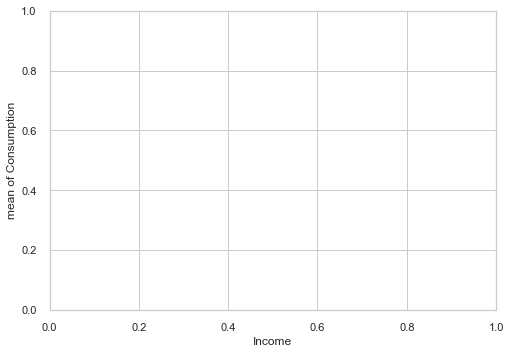

In [56]:
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(x=task6['Diet'], trace=task6['gender'], response=Fit6.fittedvalues,
             colors=['red','blue'], markers=['D','^'], ylabel='Consumption', xlabel='Income')
